# Question 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('shopify_dataset.xlsx')

In [3]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
df['order_amount'].mean()

3145.128

#### Here order amount column contains values of more than one sneakers. This could be wrong in making analysis.
#### So I suppose we should have standarize total order value by quantity of sneeaker sold, hence calculate cost per unit to evaluate Average order value

In [5]:
df['Cost_per_unit'] = df['order_amount']/df['total_items']

In [6]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Cost_per_unit
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [7]:
df['Cost_per_unit'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: Cost_per_unit, dtype: float64

#### As per the cost per unit metric we can say that the average order value is 387.74. 

In [8]:
df1 = df[['shop_id','Cost_per_unit']]

In [9]:
df_group = df1.groupby('shop_id').mean()

In [10]:
df_group

,Cost_per_unit
shop_id,
1,158.0
2,94.0
3,148.0
4,128.0
5,142.0
...,...
96,153.0
97,162.0
98,133.0


<AxesSubplot:xlabel='shop_id'>

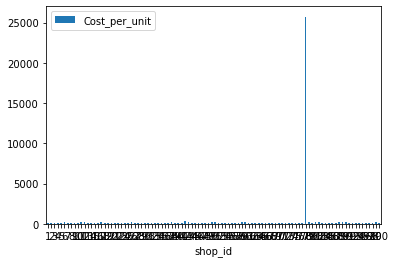

In [11]:
df_group.plot.bar(rot = 0)

In [12]:
df_group['Cost_per_unit'].describe()

count      100.000000
mean       407.990000
std       2557.462906
min         90.000000
25%        132.750000
50%        153.000000
75%        168.250000
max      25725.000000
Name: Cost_per_unit, dtype: float64

#### from the describe table it seems data is highly skewed after 75%. Let's check for last 25% 

In [13]:
df_group.tail(25)

,Cost_per_unit
shop_id,
76,155.0
77,156.0
78,25725.0
79,181.0
80,145.0
81,177.0
82,177.0
83,129.0
84,153.0


<AxesSubplot:xlabel='shop_id'>

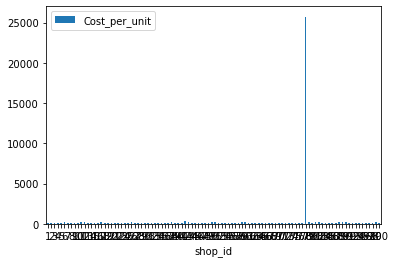

In [14]:
df_group.plot.bar(rot = 0)

#### Although Average order value is 387.743 is still looks very high 
as the mean should lie at the centre of the distribution. Here it looks like skewed right. When we constructed 
bar graph to see distribution of Cost_per_unit, find that shop 78 has a very high Cost_per_unit, which is cause of 
skewness.




# 2. Matric used 

As we can see shop no 78 is an extreme outlier which effect the true analysis of average order value we can drop this 
shop to make true estimation.

In [15]:
df_matrix = df[df.shop_id !=78]


In [16]:
df_matrix['Cost_per_unit'].describe()

count    4954.000000
mean      152.475575
std        31.260218
min        90.000000
25%       132.000000
50%       153.000000
75%       168.000000
max       352.000000
Name: Cost_per_unit, dtype: float64

# 3. Value 
#### We can say that after excluding shop 78 we have arrive to a proper Average order Value that is 152.476